# A/B Testing Analysis for Marketing Campaigns
## Objective
This analysis compares the performance of two marketing campaigns, the Control Campaign and the Test Campaign, in terms of key performance indicators:
- **Click Through Rate (CTR):** A measure of the number of clicks an ad receives relative to its impressions.
- **Conversion Rate (CR):** A measure of the number of conversions (e.g., purchases) relative to ad clicks.

The goal is to evaluate whether the Test Campaign outperforms the Control Campaign and provide actionable insights to improve future marketing strategies.


## Data Pre-Processing
The datasets for the control and test campaigns are loaded for further analysis.

In [1]:
import pandas as pd

# Load control group dataset
control_group = pd.read_csv('control_group.csv', sep=';')
control_group.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
# Load test group dataset
treatment_group = pd.read_csv('test_group.csv', sep=';')
treatment_group.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,3.08.2019,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,4.08.2019,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,5.08.2019,2297,114295,95138,5863,2106,858,956,768


The datasets are explored to check for missing values and ensure the data types align with expectations.

In [3]:
# Check for missing values
print(control_group.isnull().sum())

# Display data types
print(control_group.dtypes)


Campaign Name          0
Date                   0
Spend [USD]            0
# of Impressions       1
Reach                  1
# of Website Clicks    1
# of Searches          1
# of View Content      1
# of Add to Cart       1
# of Purchase          1
dtype: int64
Campaign Name           object
Date                    object
Spend [USD]              int64
# of Impressions       float64
Reach                  float64
# of Website Clicks    float64
# of Searches          float64
# of View Content      float64
# of Add to Cart       float64
# of Purchase          float64
dtype: object


In [4]:
# Check for missing values
print(treatment_group.isnull().sum())

# Display data types
print(treatment_group.dtypes)


Campaign Name          0
Date                   0
Spend [USD]            0
# of Impressions       0
Reach                  0
# of Website Clicks    0
# of Searches          0
# of View Content      0
# of Add to Cart       0
# of Purchase          0
dtype: int64
Campaign Name          object
Date                   object
Spend [USD]             int64
# of Impressions        int64
Reach                   int64
# of Website Clicks     int64
# of Searches           int64
# of View Content       int64
# of Add to Cart        int64
# of Purchase           int64
dtype: object


Missing values in key columns are filled with the mean of the respective column. This ensures that the analysis can proceed without disruptions caused by missing data.

In [5]:
# Handle missing values by filling with mean

columns_with_missing_values = [
    '# of Impressions',
    'Reach',
    '# of Website Clicks',
    '# of Searches',
    '# of View Content',
    '# of Add to Cart',
    '# of Purchase'
]

for column in columns_with_missing_values:
    control_group[column] = control_group[column].fillna(control_group[column].mean())

print(control_group.isnull().sum()) 

Campaign Name          0
Date                   0
Spend [USD]            0
# of Impressions       0
Reach                  0
# of Website Clicks    0
# of Searches          0
# of View Content      0
# of Add to Cart       0
# of Purchase          0
dtype: int64


## Analysis and Insights
Further analysis will compare metrics between control and test campaigns, with statistical testing to determine if differences are significant.

In [6]:
# Concat the two dataframes
data = pd.concat([control_group, treatment_group])


In [7]:
column_names = ['Campaign Name', 'Date', 'Amount Spent', 'Impressions', 
                'Unique Impressions', 'Clicks', 'Number of Searches', 
                'Views', 'Add to Carts', 'Purchases']

In [8]:
# Renaming columns for clarity
data.columns = column_names

In [9]:
data['CTR'] = data['Clicks'] / data['Impressions']
data['CR'] = data['Purchases'] / data['Clicks']

metrics = ['CTR', 'CR']
average_metrics = data.groupby('Campaign Name')[metrics].mean().reset_index()
average_metrics


,Campaign Name,CTR,CR
0,Control Campaign,0.050879,0.114221
1,Test Campaign,0.102423,0.092312


The Test Campaign achieved a higher Click-Through Rate (CTR) compared to the Control Campaign, indicating better ad engagement. However, the Control Campaign had a higher Conversion Rate (CR), suggesting that it was more effective in driving actions from clicks. Further analysis is needed to optimize the Test Campaign's conversion process.

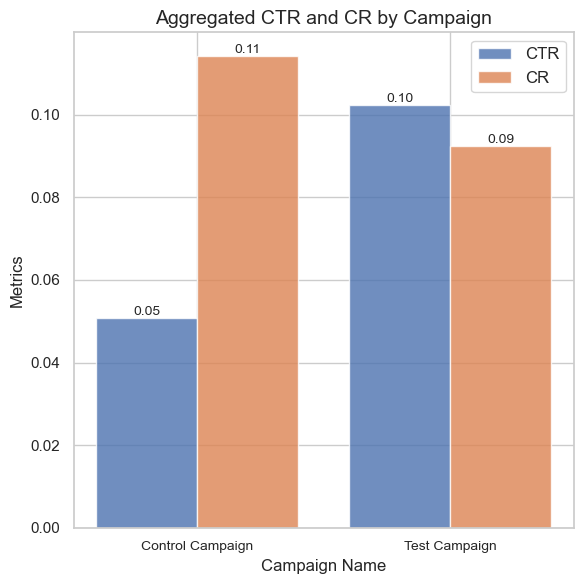

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data preparation
average_metrics = data.groupby('Campaign Name')[['CTR', 'CR']].mean().reset_index()

# Bar chart
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

# Plot bar chart for CTR and CR
x = average_metrics['Campaign Name']
ctr_values = average_metrics['CTR']
cr_values = average_metrics['CR']

# Width of the bars
bar_width = 0.4
x_positions = range(len(x))

# Create bar charts for CTR and CR
bars_ctr = ax.bar([p - bar_width/2 for p in x_positions], ctr_values, bar_width, label='CTR', alpha=0.8)
bars_cr = ax.bar([p + bar_width/2 for p in x_positions], cr_values, bar_width, label='CR', alpha=0.8)

# Set title, labels, and ticks
ax.set_title('Aggregated CTR and CR by Campaign', fontsize=14)
ax.set_xlabel('Campaign Name', fontsize=12)
ax.set_ylabel('Metrics', fontsize=12)
ax.set_xticks(x_positions)
ax.set_xticklabels(x, fontsize=10)
ax.legend(fontsize=12)

# Display values on top of bars
for bar in bars_ctr + bars_cr:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

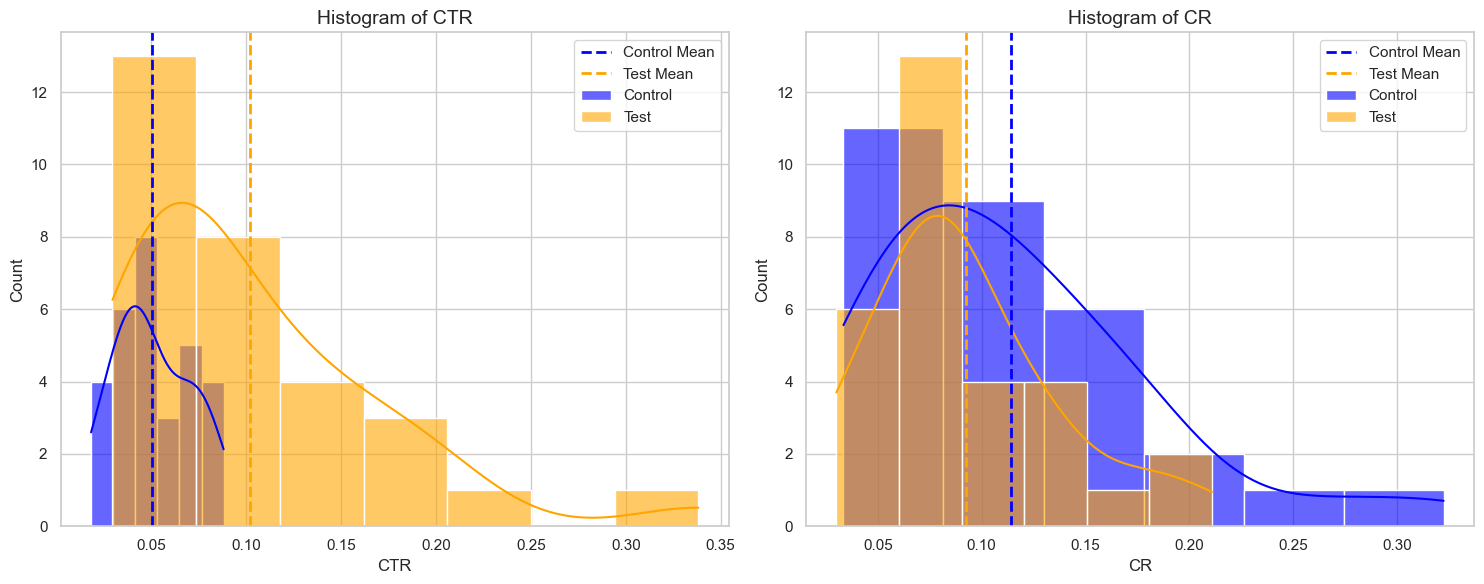

In [12]:
# Set plot style
sns.set(style="whitegrid")

# Separate control and test campaigns
control_campaign = data[data['Campaign Name'] == 'Control Campaign']
test_campaign = data[data['Campaign Name'] == 'Test Campaign']

# Calculate means
control_ctr_mean = control_campaign['CTR'].mean()
test_ctr_mean = test_campaign['CTR'].mean()

control_cr_mean = control_campaign['CR'].mean()
test_cr_mean = test_campaign['CR'].mean()

# Plot histograms
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Histogram for CTR
sns.histplot(control_campaign['CTR'], kde=True, color='blue', label='Control', ax=axes[0], alpha=0.6)
sns.histplot(test_campaign['CTR'], kde=True, color='orange', label='Test', ax=axes[0], alpha=0.6)
axes[0].axvline(control_ctr_mean, color='blue', linestyle='--', linewidth=2, label='Control Mean')
axes[0].axvline(test_ctr_mean, color='orange', linestyle='--', linewidth=2, label='Test Mean')
axes[0].set_title('Histogram of CTR', fontsize=14)
axes[0].set_xlabel('CTR', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].legend()

# Histogram for CR
sns.histplot(control_campaign['CR'], kde=True, color='blue', label='Control', ax=axes[1], alpha=0.6)
sns.histplot(test_campaign['CR'], kde=True, color='orange', label='Test', ax=axes[1], alpha=0.6)
axes[1].axvline(control_cr_mean, color='blue', linestyle='--', linewidth=2, label='Control Mean')
axes[1].axvline(test_cr_mean, color='orange', linestyle='--', linewidth=2, label='Test Mean')
axes[1].set_title('Histogram of CR', fontsize=14)
axes[1].set_xlabel('CR', fontsize=12)
axes[1].set_ylabel('Count', fontsize=12)
axes[1].legend()

# Adjust layout
plt.tight_layout()
plt.show()

#### CTR (Click Through Rate) - Hypothesis Testing¶

Null Hypothesis (H0): The mean CTR of the Control Campaign is equal to the mean CTR of the Test Campaign. 

Alternative Hypothesis (H1): The mean CTR of the Control Campaign is not equal to the mean CTR of the Test Campaign.

#### CR (Conversion Rate) - Hypothesis Testing
Null Hypothesis (H0): The mean CR of the Control Campaign is equal to the mean CR of the Test Campaign.

Alternative Hypothesis (H1): The mean CR of the Control Campaign is not equal to the mean CR of the Test Campaign.

In [13]:
control_data = data[data['Campaign Name'] == 'Control Campaign']
test_data = data[data['Campaign Name'] == 'Test Campaign']

control_ctr = control_data['CTR']
test_ctr = test_data['CTR']

In [15]:
from scipy.stats import shapiro

def test_normality(data, metric):
    stat, p = shapiro(data[metric])
    if p < 0.05:
        print(f"{metric} is not normally distributed (p-value: {p:.4f}).")
    else:
        print(f"{metric} is normally distributed (p-value: {p:.4f}).")

# Test normality for CTR and CR
test_normality(control_data, 'CTR')
test_normality(test_data, 'CTR')
test_normality(control_data, 'CR')
test_normality(test_data, 'CR')

CTR is normally distributed (p-value: 0.2807).
CTR is not normally distributed (p-value: 0.0004).
CR is not normally distributed (p-value: 0.0057).
CR is not normally distributed (p-value: 0.0373).


As CTR and CR are not normally distributed, we will proceed with the Mann-Whitney U Test to perform A/B testing for CTR and CR.

In [17]:
from scipy.stats import mannwhitneyu

def mann_whitney_test(control, treatment, metric):
    stat, p = mannwhitneyu(control[metric], treatment[metric], alternative='two-sided')
    print(f"Mann-Whitney U Test for {metric}: U-Statistic = {stat:.4f}, p-value = {p:.4f}")

# Run Mann-Whitney U Test
mann_whitney_test(control_data, test_data, 'CTR')
mann_whitney_test(control_data, test_data, 'CR')

Mann-Whitney U Test for CTR: U-Statistic = 199.0000, p-value = 0.0002
Mann-Whitney U Test for CR: U-Statistic = 523.0000, p-value = 0.2838


The p-value for CTR is less than the commonly used significance level of 0.05, indicating a statistically significant difference between the Control and Test campaigns, suggesting that the Test Campaign had a meaningful impact on improving CTR. In contrast, the p-value for CR is greater than 0.05, indicating no statistically significant difference between the two campaigns, implying that the change in campaign strategy did not have a notable effect on conversion rates.

#### Effect Size: Cliff's Delta
Cliff's Delta quantifies the magnitude of the difference between two groups:
- *Small Effect:* 0.11 < |Delta| <= 0.33
- *Medium Effect:* 0.33 < |Delta| <= 0.47
- *Large Effect:* |Delta| > 0.47


In [19]:
# Effect size test

from cliffs_delta import cliffs_delta
import statsmodels.stats.api as sms


def calculate_cliffs_delta(control, treatment, metric):
    delta, size = cliffs_delta(control[metric].values, treatment[metric].values)
    print(f"Cliff's Delta for {metric}: Delta = {delta:.4f}, Size = {size}")

calculate_cliffs_delta(control_data, test_data, 'CTR')
calculate_cliffs_delta(control_data, test_data, 'CR')

Cliff's Delta for CTR: Delta = -0.5578, Size = large
Cliff's Delta for CR: Delta = 0.1622, Size = small


The Test Campaign shows a large, meaningful improvement in CTR compared to the Control Campaign, as indicated by both statistical significance (p-value) and practical significance (large Cliff's Delta). However, the small effect size for CR suggests that the differences in conversion rates between the campaigns are not practically significant, reinforcing the need to investigate potential bottlenecks in the conversion process.

#### Sample Size Effect

In [20]:
from statsmodels.stats.power import TTestIndPower

# Parameters
effect_size = 0.5  # Medium effect size (Cohen's d)
alpha = 0.05       # Significance level
power = 0.9        # Desired power (90%)

# Required sample size
analysis = TTestIndPower()
required_sample_size = analysis.solve_power(effect_size=effect_size, alpha=alpha, power=power, ratio=1)

print(f"Required sample size per group for detecting a medium effect size: {required_sample_size:.2f}")


Required sample size per group for detecting a medium effect size: 85.03


Based on the sample size analysis for a medium effect size with 90% power, the required sample size is 85 samples per group. However, the current dataset contains only 30 samples for each campaign type. This limited sample size may reduce the accuracy and reliability of the results. A larger sample size would improve the statistical power and provide more robust and generalizable conclusions.

In [21]:
def confidence_interval(data, metric, alpha=0.05):
    ci = sms.DescrStatsW(data[metric]).tconfint_mean(alpha=alpha)
    print(f"Confidence Interval for {metric}: {ci[0]:.4f} to {ci[1]:.4f}")

confidence_interval(control_data, 'CTR')
confidence_interval(test_data, 'CTR')
confidence_interval(control_data, 'CR')
confidence_interval(test_data, 'CR')

Confidence Interval for CTR: 0.0434 to 0.0584
Confidence Interval for CTR: 0.0771 to 0.1277
Confidence Interval for CR: 0.0891 to 0.1393
Confidence Interval for CR: 0.0757 to 0.1089


Since the confidence intervals for CTR do not overlap, we can infer a significant difference in CTR between the Control and Test campaigns, with the Test Campaign consistently performing better in terms of click-through rates. In contrast, the overlap between the confidence intervals for CR suggests that the difference in conversion rates between the two campaigns is not statistically significant, aligning with the Mann-Whitney U Test results. Overall, the confidence intervals confirm that the Test Campaign significantly improves CTR compared to the Control Campaign, while the overlap in CR intervals indicates no meaningful difference in conversion rates. Confidence intervals provide a comprehensive view of the reliability and significance of these observed differences.

## Conclusions and Recommendations

### Key Findings
1. **CTR Improvement:** The Test Campaign significantly improves CTR compared to the Control Campaign, supported by statistical significance (p < 0.05) and a large effect size.
2. **No Significant CR Difference:** The difference in CR between the two campaigns is not statistically or practically significant.
3. **Sample Size Limitation:** The current sample size (30 per group) is insufficient for detecting medium effect sizes with high statistical power.

### Recommendations
1. **Focus on CTR Optimization:** Continue using strategies from the Test Campaign to improve CTR further.
2. **Address Conversion Bottlenecks:** Investigate the conversion funnel to identify and mitigate issues preventing higher CR.
3. **Increase Sample Size:** Collect more data to ensure robust and reliable conclusions for future campaigns.
4. **Segment-Specific Strategies:** Analyze campaign performance across different audience segments (e.g., device type, geography) to tailor strategies effectively.
